<a href="https://colab.research.google.com/github/mattselph/ml-notebooks/blob/master/2_ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
One of the simplest forms of Machine Learning, you fit a best-fit line to a two-dimensional plot containing one independent variable (called a ```feature``` in Machine Learning) and a dependent variable (called a ```target``` or ```outcome``` in Machine Learning).

# Data
This uses the boston housing dataset which is included in ```scikit-learn```.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

boston = datasets.load_boston()

The features are in a numpy array called ```boston['data']``` and the targets are in a numpy array called ```boston['target']```.  The target values represent median home prices in Boston, in thousands.

In [2]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Question to Answer
Can we predict the median home value based on the number of rooms in the home using linear regression?

## Preprocessing
The ```RM``` feature name represents the proportion of blacks by town.  Get that into its own array and plot it against the median home prices to see if there's a correlation.

In [0]:
rooms = boston.data[:, np.newaxis, 5]      # RM is the feature column label
prices = boston.target

prices = prices.reshape(len(prices), 1)

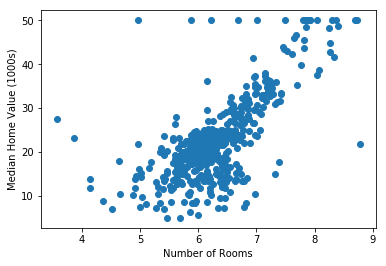

In [4]:
# scatter plot
plt.scatter(x=rooms, y=prices)
plt.xlabel('Number of Rooms')
plt.ylabel('Median Home Value (1000s)')
plt.show()

## Train the Model
The data shows there is a positive correlation between number of rooms and median home prices.  But can we use the number of rooms to predict a home's median price?  

When training a model, you need a training set that's a subset of all your data.  The rest belongs to a test set that you use to run your trained model against to see how accurate it is.  An 80/20 split is common (80% training, 20% testing).

**In regression, the way you train a model is to fit a line.**

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# 80/20 test/train split
X_train = rooms[:round(len(rooms)*.80)]
X_test = rooms[round(len(rooms)*.80)+1:]

y_train = prices[:round(len(prices)*.80)]
y_test = prices[round(len(prices)*.80)+1:]

# fit the line
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test the Model
Now use the model against the test dataset.  

In [0]:
pred = regr.predict(X_test)

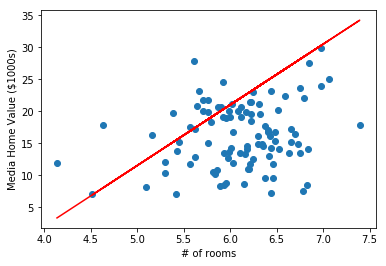

In [7]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, pred, color='red')
plt.xlabel('# of rooms')
plt.ylabel("Media Home Value ($1000s)")
plt.show()

## Evaluating the model
Regression lines seek to minimize the mean squared error between the points on the graph.  We can see the mean squared error (MSE) and the variance, which is a statistical measure of how accurate the prediction is with ```scikit-learn```.

In [8]:
# r2_score is the variance
from sklearn.metrics import mean_squared_error, r2_score

# provide the actual test data and the predicted values 
# so it can see how accurate it was
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("MSE: %.2f\tVariance: %.2f" % (mse, r2))

MSE: 72.90	Variance: -1.85


The closer to 0 the MSE is, the better.  The closer to 1 the Variance is, the better.

# Conclusion
The MSE and Variance aren't that great, meaning we can't really determine with a lot of accuracy the median price of a home based on the number of rooms.  